In [29]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, confusion_matrix, accuracy_score, precision_score, recall_score, make_scorer
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
sns.set()

### ***Seen vs. unseen data***

Model's tend to have higher accuracy on observations they have seen before. In the candy dataset, predicting the popularity of Skittles will likely have higher accuracy than predicting the popularity of Andes Mints; Skittles is in the dataset, and Andes Mints is not.

You've built a model based on 50 candies using the dataset `X_train` and need to report how accurate the model is at predicting the popularity of the 50 candies the model was built on, and the 35 candies (`X_test`) it has never seen. You will use the mean absolute error, **`mae()`**, as the accuracy metric.

* Using `X_train` and `X_test` as input data, create arrays of predictions using **`model.predict()`**.

* Calculate model accuracy on both data the model has seen and data the model has not seen before.

* Use the print statements to print the seen and unseen data.

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

cd = pd.read_csv('candy-data.csv')
X = cd.drop(columns=['competitorname', 'winpercent']).values
y = cd['winpercent'].values
X_train, X_test = X[:50], X[50:]
y_train, y_test = y[:50], y[50:]
model = RandomForestRegressor(n_estimators=50, random_state=1111)

###############################################################################

# The model is fit using X_train and y_train
model.fit(X_train, y_train)

# Create vectors of predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Train/Test Errors
train_error = mae(y_true=y_train, y_pred=train_predictions)
test_error = mae(y_true=y_test, y_pred=test_predictions)

# Print the accuracy for seen and unseen data
print("Model error on seen data: {0:.2f}.".format(train_error))
print("Model error on unseen data: {0:.2f}.".format(test_error))

Model error on seen data: 3.28.
Model error on unseen data: 11.06.


When models perform differently on training and testing data, you should look to model validation to ensure you have the best performing model. In the next lesson, you will start building models to validate.

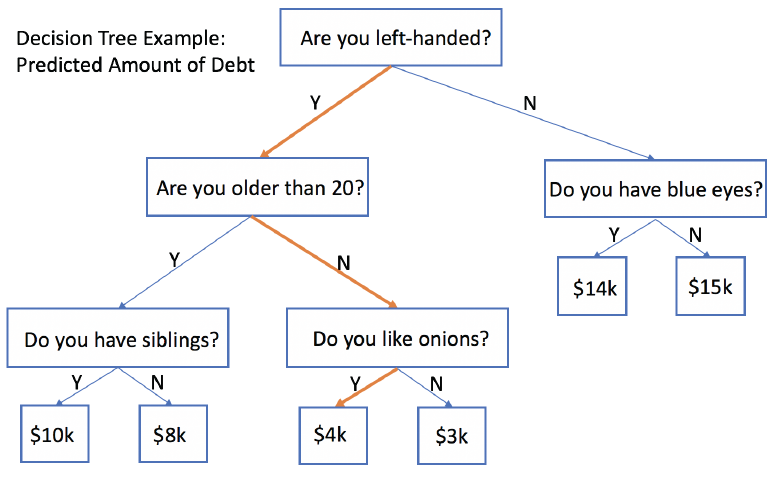

# ***Decision Trees***

* Decision trees look at various ways to split data until only a few or even a single observation remains.  The split may be
  * categorcical
  * continuously numerical

* A new observation follows the tree based on its own data until it reaches the end-node called a leaf.

* The value in the end-node represents the ***AVERAGE*** of all people in the ***TRAINING*** data who ended in that leaf.  (a.k.a. mean prediction)

# ***Random forest parameters***

* **`n_estimators`** : the number of trees in the forest
* **`max_depth`** : the maximum depth of the trees
* **`random_state`** : random seed

# ***Feature importance***

* The larger the number, the more importance in the model

In [ ]:
for i, item in enumerate(rfr.feature_importances_):
    print("{0:s}: {1:.2f}".format(X.columns[i], item))



```
weight:           0.50
height:           0.39
left_handed:      0.72
union_preference: 0.05
eye_color:        0.03
```

### ***Set parameters and fit a model***

Predictive tasks fall into one of two categories: regression or classification. In the candy dataset, the outcome is a continuous variable describing how often the candy was chosen over another candy in a series of 1-on-1 match-ups. To predict this value (the win-percentage), you will use a regression model.

In this exercise, you will specify a few parameters using a random forest regression model `rfr`.

* Add a parameter to `rfr` so that the number of trees built is `100` and the maximum depth of these trees is `6`.

* Make sure the model is reproducible by adding a random state of `1111`.

* Use the **`.fit()`** method to train the random forest regression model with `X_train` as the input data and `y_train` as the response.

In [ ]:
# Set the number of trees
rfr.n_estimators = 100

# Add a maximum depth
rfr.max_depth = 6

# Set the random state
rfr.random_state = 1111

# Fit the model
rfr.fit(X_train, y_train)

You have updated parameters ***after*** the model was initialized. This approach is helpful when you need to update parameters. Before making predictions, let's see which candy characteristics were most important to the model.

### ***Feature importances***

Although some candy attributes, such as chocolate, may be extremely popular, it doesn't mean they will be *important* to model prediction. After a random forest model has been fit, you can review the model's attribute, **`.feature_importances_`**, to see which variables had the biggest impact. You can check how important each variable was in the model by looping over the feature importance array using **`enumerate()`**.




* Loop through the feature importance output of `rfr`.
* Print the column names of `X_train` and the importance score for that column.

In [15]:
from sklearn.ensemble import RandomForestRegressor

cd = pd.read_csv('candy-data.csv')
X_train, y_train = cd.drop(columns=['competitorname', 'winpercent']), cd['winpercent'].values

rfr = RandomForestRegressor(n_estimators=100, random_state=1111, max_depth=6)

# Fit the model using X and y
rfr.fit(X_train, y_train)

# Print how important each column is to the model
for i, item in enumerate(rfr.feature_importances_):
      # Use i and item to print out the feature importance of each column
    print("{0:s}: {1:.2f}".format(X_train.columns[i], item))

chocolate: 0.44
fruity: 0.03
caramel: 0.02
peanutyalmondy: 0.05
nougat: 0.01
crispedricewafer: 0.03
hard: 0.01
bar: 0.02
pluribus: 0.02
sugarpercent: 0.17
pricepercent: 0.19


No surprise here - chocolate *is* the most important variable. **`.feature_importances_`** is a great way to see which variables were important to your random forest model.

# ***Using `.predict()` for classification***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1111)
rfc.fit(X_train, y_train)
rfc.predict(X_test)



```
array([1, 1, 1, 1, 0, 1, ...])
```



In [ ]:
pd.Series(rfc.predict(X_test)).value_counts()



```
1 627
0 331
```



# ***Predicting probabilities***

In [ ]:
rfc.predict_proba(X_test)



```
array([[0. , 1. ],
       [0.1, 0.9],
       [0.1, 0.9],
             ...])
```

* ยกตัวอย่างเช่น แถวที่สอง เลข 0.1 กับ 0.9 หมายความว่ามีโอกาสแพ้ 10% และ ชนะ 90%

# ***Which parameters went into a scikit-learn model***




In [ ]:
rfc.get_params()



```
{'bootstrap': True,
'class_weight': None,
'criterion': 'gini',
...}
```



In [ ]:
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)



```
0.8989
```

Almost 90% of games were correctly predicted by the model.

### ***Classification predictions***

In model validation, it is often important to know more about the predictions than just the final classification. When predicting who will win a game, most people are also interested in how likely it is a team will win.

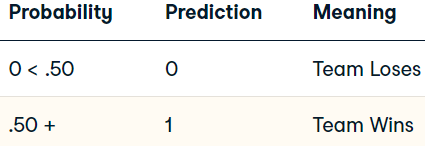

In this exercise, you look at the methods, **`.predict()`** and **`.predict_proba()`** using the `tic_tac_toe` dataset. The first method will give a prediction of whether Player One will win the game, and the second method will provide the probability of Player One winning. Use `rfc` as the random forest classification model.

* Create two arrays of predictions. One for the classification values and one for the predicted probabilities.

* Use the **`.value_counts()`** method for a pandas Series to print the number of observations that were assigned to each class.

* Print the first observation of `probability_predictions` to see how the probabilities are structured.


In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=6, n_estimators=50, random_state=1111)

# Fit the rfc model. 
rfc.fit(X_train, y_train)

# Create arrays of predictions
classification_predictions = rfc.predict(X_test)
probability_predictions = rfc.predict_proba(X_test)

# Print out count of binary predictions
print(pd.Series(classification_predictions).value_counts())

# Print the first value from probability_predictions
print('The first predicted probabilities are: {}'.format(probability_predictions[0]))

1    563
0    204
dtype: int64
The first predicted probabilities are: [0.26524423 0.73475577]


You can see there were 563 observations where Player One was predicted to win the Tic-Tac-Toe game. Also, note that the `predicted_probabilities` array contains lists with only two values because you only have two possible responses (win or lose). Remember these two methods, as you will use them a lot throughout this course.

* 0.73475577 คือ ความน่าจะเป็นที่ชนะ

### ***Reusing model parameters***
Replicating model performance is vital in model validation. Replication is also important when sharing models with co-workers, reusing models on new data or asking questions on a website such as Stack Overflow. You might use such a site to ask other coders about model errors, output, or performance. The best way to do this is to replicate your work by reusing model parameters.

In this exercise, you use various methods to recall which parameters were used in a model.

* Print out the characteristics of the model `rfc` by simply printing the model.
* Print just the random state of the model.
* Print the dictionary of model parameters.

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)

# Print the classification model
print(rfc)

# Print the classification model's random state parameter
print('The random state is: {}'.format(rfc.random_state))

# Print all parameters
print('Printing the parameters dictionary: {}'.format(rfc.get_params()))

Recalling which parameters were used will be helpful going forward. Model validation and performance rely heavily on which parameters were used, and there is no way to replicate a model without keeping track of the parameters used!

### ***Random forest classifier***

This exercise reviews the four modeling steps discussed throughout this chapter using a random forest classification model. You will:

1. Create a random forest classification model.
2. Fit the model using the `tic_tac_toe` dataset.
3. Make predictions on whether Player One will win (1) or lose (0) the current game.
4. Finally, you will evaluate the overall accuracy of the model.

* Create `rfc` using the scikit-learn implementation of random forest classifiers and set a random state of `1111`.
* Fit `rfc` using `X_train` for the training data and `y_train` for the responses.
* Predict the class values for `X_test`.
* Use the method **`.score()`** to print an accuracy metric for `X_test` given the actual values `y_test`.



In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)

# Fit rfc using X_train and y_train
rfc.fit(X_train, y_train)

# Create predictions on X_test
predictions = rfc.predict(X_test)
print(predictions[0:5])

# Print model accuracy using score() and the testing data
print(rfc.score(X_test, y_test))

[1 1 1 1 1]
0.817470664928292


Notice the first five predictions were all 1, indicating that Player One is predicted to win all five of those games. You also see the model accuracy was only 82%.

# ***Train Test Split***

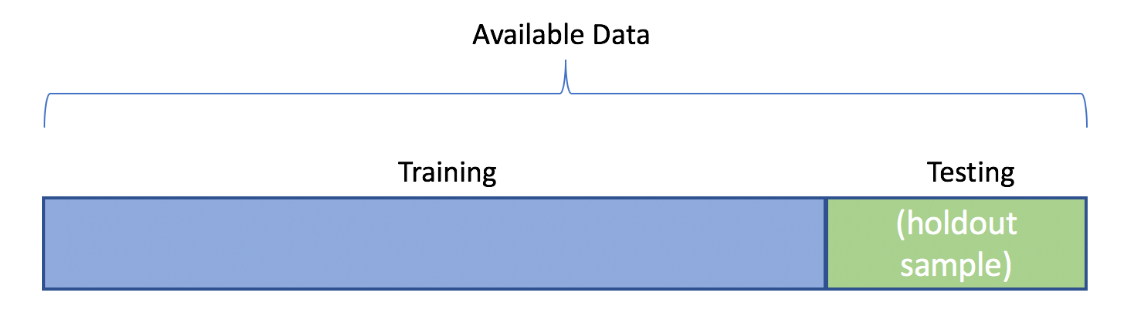



In [47]:
tic_tac_toe = pd.read_csv("tic-tac-toe.csv")
X = pd.get_dummies(tic_tac_toe.iloc[:,0:9])
y = tic_tac_toe.iloc[:, 9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9008350730688935, random_state=1111)

# ***Creating holdout samples***

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

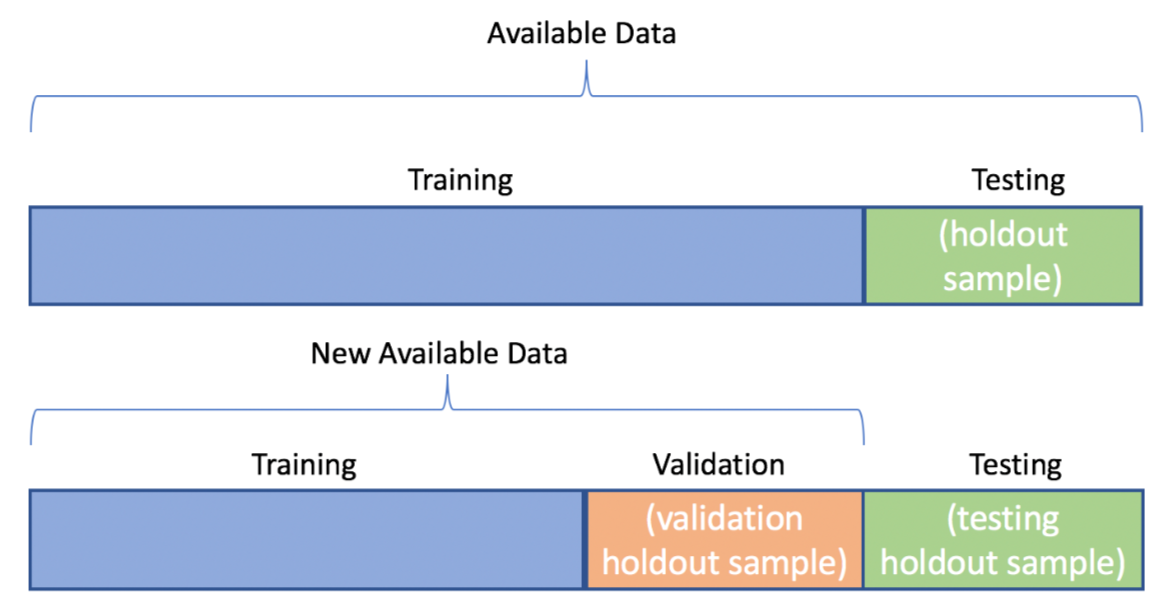

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=11111)

### ***Create one holdout set***

Your boss has asked you to create a simple random forest model on the `tic_tac_toe` dataset. She doesn't want you to spend much time selecting parameters; rather she wants to know how well the model will perform on future data. For future Tic-Tac-Toe games, it would be nice to know if your model can predict which player will win.

The dataset `tic_tac_toe` has been loaded for your use.

Note that in Python, `=\` indicates the code was too long for one line and has been split across two lines.

* Create the `X` dataset by creating dummy variables for all of the categorical columns.
* Split `X` and `y` into train (`X_train`, `y_train`) and test (`X_test`, `y_test`) datasets.
* Split the datasets using 10% for testing

In [35]:
from sklearn.model_selection import train_test_split

# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:,0:9])
y = tic_tac_toe.iloc[:, 9]

# Create training and testing datasets. Use 10% for the test set
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.1, random_state=1111)

Without the holdout set, you cannot truly validate a model. Let's move on to creating two holdout sets.

### ***Create two holdout sets***

You recently created a simple random forest model to predict Tic-Tac-Toe game wins for your boss, and at her request, you did not do any parameter tuning. Unfortunately, the overall model accuracy was too low for her standards. This time around, she has asked you to focus on model performance.

Before you start testing different models and parameter sets, you will need to split the data into training, validation, and testing datasets. Remember that after splitting the data into training and testing datasets, the validation dataset is created by splitting the training dataset.

The datasets `X` and `y` have been loaded for your use.

* Create temporary datasets and testing datasets (`X_test`, `y_test`). Use 20% of the overall data for the testing datasets.

* Using the temporary datasets (`X_temp`, `y_temp`), create training (`X_train`, `y_train`) and validation (`X_val`, `y_val`) datasets.

* Use 25% of the temporary data for the validation datasets.

In [36]:
# Create temporary training and final testing datasets
X_temp, X_test, y_temp, y_test  =\
    train_test_split(X, y, test_size=0.2, random_state=1111)

# Create the final training and validation datasets
X_train, X_val, y_train, y_val =\
    train_test_split(X_temp, y_temp, test_size=0.25, random_state=1111)

You now have training, validation, and testing datasets, but do you know when you need both validation and testing datasets? 

### ***Why use holdout sets***

It is important to understand when you would use three datasets (training, validation, and testing) instead of two (training and testing). There is no point in creating an additional dataset split if you are not going to use it.

When should you consider using training, validation, and testing datasets?

* When testing parameters, tuning hyper-parameters, or anytime you are frequently evaluating model performance.
* Anytime we are evaluating model performance repeatedly we need to create training, validation, and testing datasets.

# ***Mean absolute error (MAE)***

$$MAE = \frac{\sum_{i=1}^n|y_i - \hat y_i|}{n}$$


Communicating modeling results can be difficult. However, most clients understand that on average, a predictive model was off by some number. This makes explaining the mean absolute error easy. For example, when predicting the number of wins for a basketball team, if you predict 42, and they end up with 40, you can easily explain that the error was two wins.

In this exercise, you are interviewing for a new position and are provided with two arrays. `y_test`, the true number of wins for all 30 NBA teams in 2017 and `predictions`, which contains a prediction for each team. To test your understanding, you are asked to both manually calculate the MAE and use `sklearn`.

* Manually calculate the MAE using `n` as the number of observations predicted.
* Calculate the MAE using `sklearn`.
* Print off both accuracy values using the print statements.



In [38]:
from sklearn.metrics import mean_absolute_error

predictions = np.array([60, 62, 42, 42, 30, 50, 52, 42, 44, 35, 30, 30, 35, 40, 15, 72, 58,
       60, 40, 42, 45, 46, 40, 35, 25, 40, 20, 34, 25, 24])
y_test = np.array([53, 51, 51, 49, 43, 42, 42, 41, 41, 37, 36, 31, 29, 28, 20, 67, 61,
       55, 51, 51, 47, 43, 41, 40, 34, 33, 32, 31, 26, 24])

# Manually calculate the MAE
n = len(predictions)
mae_one = sum(abs(y_test - predictions)) / n
print('With a manual calculation, the error is {}'.format(mae_one))

# Use scikit-learn to calculate the MAE
mae_two = mean_absolute_error(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mae_two))

With a manual calculation, the error is 5.9
Using scikit-learn, the error is 5.9


These predictions were about six wins off on average. This isn't too bad considering NBA teams play 82 games a year. Let's see how these errors would look if you used the mean squared error instead.

# ***Mean squared error (MSE)***

$$MSE = \frac{\sum_{i=1}^n(y_i - \hat y_i)^2}{n}$$



In [39]:
from sklearn.metrics import mean_squared_error

n = len(predictions)
# Finish the manual calculation of the MSE
mse_one = sum((y_test - predictions)**2) / n
print('With a manual calculation, the error is {}'.format(mse_one))

# Use the scikit-learn function to calculate MSE
mse_two = mean_squared_error(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mse_two))

With a manual calculation, the error is 49.1
Using scikit-learn, the error is 49.1


If you run any additional models, you will try to beat an MSE of 49.1, which is the average squared error of using your model. Although the MSE is not as interpretable as the MAE, it will help us select a model that has fewer 'large' errors.

# ***Performance on data subsets***

In professional basketball, there are two conferences, the East and the West. Coaches and fans often only care about how teams in their own conference will do this year.

You have been working on an NBA prediction model and would like to determine if the predictions were better for the East or West conference. You added a third array to your data called `labels`, which contains an "E" for the East teams, and a "W" for the West. `y_test` and `predictions` have again been loaded for your use.

* Create an array `east_teams` that can be used to filter `labels` to East conference teams.

* Create the arrays `true_east` and `preds_east` by filtering the arrays `y_test` and `predictions`.

* Use the print statements to print the MAE (using scikit-learn) for the East conference. The **`mean_absolute_error`** function has been loaded as `mae`.

* The variable `west_error` contains the MAE for the West teams. Use the print statement to print out the Western conference MAE.

In [40]:
labels = np.array(['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W'])

west_error = 5.01

# Find the East conference teams
east_teams = labels == "E"

# Create arrays for the true and predicted values
true_east = y_test[east_teams]
preds_east = predictions[east_teams]

# Print the accuracy metrics
print('The MAE for East teams is {}'.format(
    mae(true_east, preds_east)))

# Print the West accuracy
print('The MAE for West conference is {}'.format(west_error))

The MAE for East teams is 6.733333333333333
The MAE for West conference is 5.01


It looks like the Western conference predictions were about two games better on average. Over the past few seasons, the Western teams have generally won the same number of games as the experts have predicted. Teams in the East are just not as predictable as those in the West.

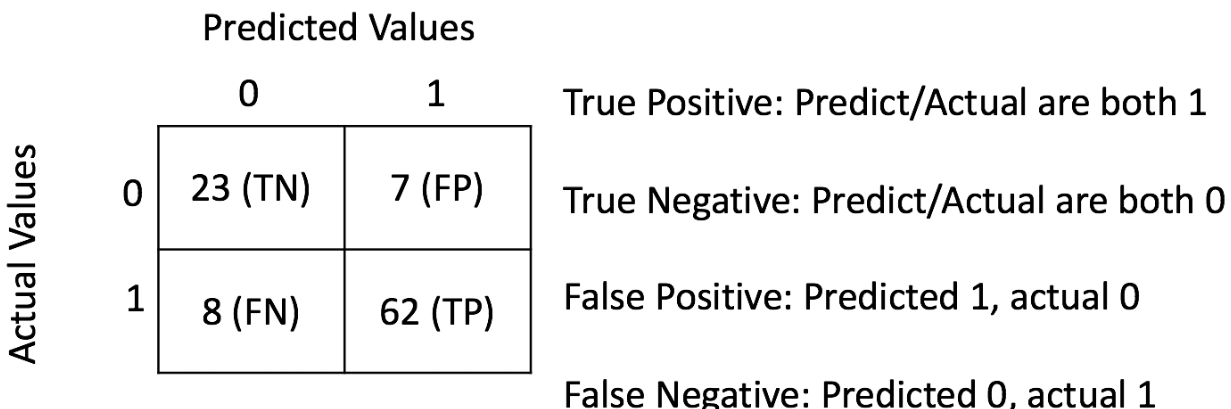

#  ***Accuracy***

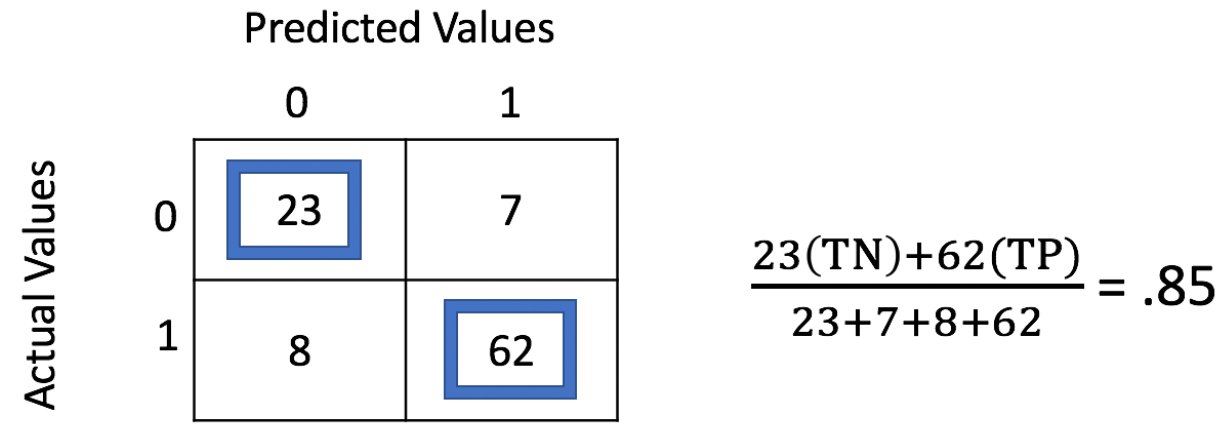

# ***Precision***

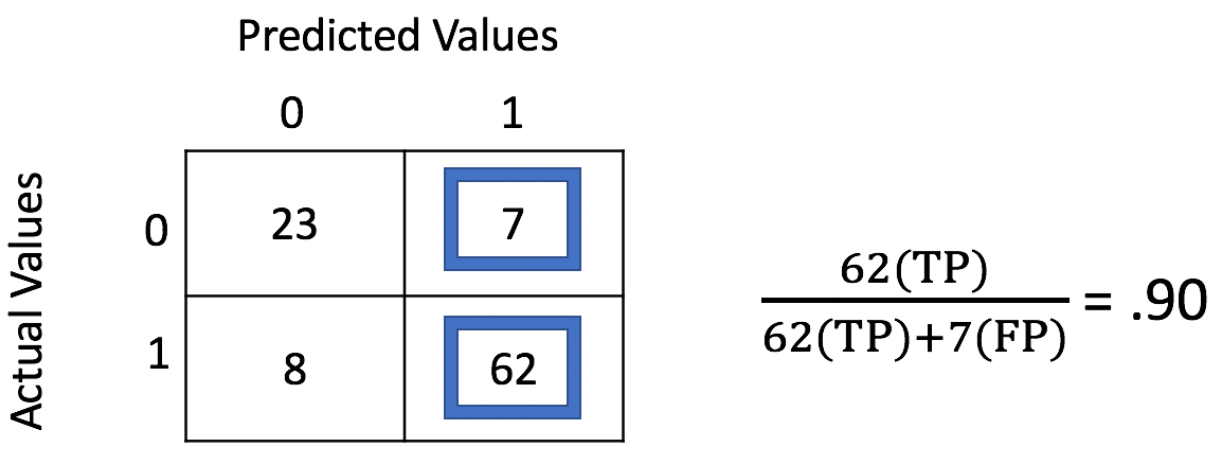

# ***Recall***

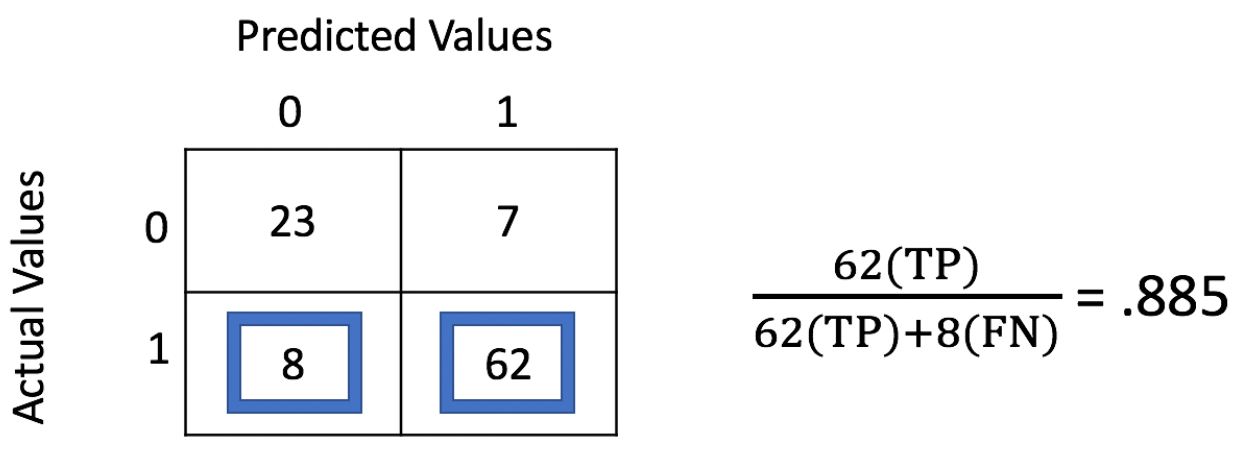

### ***Confusion matrices***

Confusion matrices are a great way to start exploring your model's accuracy. They provide the values needed to calculate a wide range of metrics, including sensitivity, specificity, and the F1-score.

You have built a classification model to predict if a person has a broken arm based on an X-ray image. On the testing set, you have the following confusion matrix:


```

        Prediction: 0	Prediction: 1
Actual: 0	324 (TN)	15 (FP)
Actual: 1	123 (FN)	491 (TP)
```
* Use the confusion matrix to calculate overall accuracy.
* Use the confusion matrix to calculate precision and recall.
* Use the three print statements to print each accuracy value.


In [43]:
# Calculate and print the accuracy
accuracy = (491 + 324) / (953)
print("The overall accuracy is {0: 0.2f}".format(accuracy))

# Calculate and print the precision
precision = (491) / (491 + 15)
print("The precision is {0: 0.2f}".format(precision))

# Calculate and print the recall
recall = (491) / (491 + 123)
print("The recall is {0: 0.2f}".format(recall))

The overall accuracy is  0.86
The precision is  0.97
The recall is  0.80


In this case, a true positive is a picture of an actual broken arm that was also predicted to be broken. Doctors are okay with a few additional false positives (predicted broken, not actually broken), as long as you don't miss anyone who needs immediate medical attention.

### ***Confusion matrices, again***

Creating a confusion matrix in Python is simple. The biggest challenge will be making sure you understand the orientation of the matrix. This exercise makes sure you understand the **`sklearn`** implementation of confusion matrices. Here, you have created a random forest model using the `tic_tac_toe` dataset `rfc` to predict outcomes of `0` (loss) or `1` (a win) for Player One.

Note: If you read about confusion matrices on another website or for another programming language, the values might be reversed.


* Using the model `rfc`, create category predictions on the test set `X_test`.
* Create a confusion matrix using `sklearn`.
* Print the value from cm that represents the actual 1s that were predicted as 1s (true positives).

In [48]:
from sklearn.metrics import confusion_matrix

tic_tac_toe = pd.read_csv("tic-tac-toe.csv")
X = pd.get_dummies(tic_tac_toe.iloc[:,0:9])
y = tic_tac_toe.iloc[:, 9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9008350730688935, random_state=1111)
rfc = RandomForestClassifier(n_estimators=500, random_state=1111)
rfc.fit(X_train, y_train)

# Create predictions
test_predictions = rfc.predict(X_test)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print(cm)

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is: {}".format(cm[1, 1]))

[[177 123]
 [ 92 471]]
The number of true positives is: 471


Row 1, column 1 represents the number of actual 1s that were predicted 1s (the true positives). Always make sure you understand the orientation of the confusion matrix before you start using it!

### ***Precision vs. recall***

The accuracy metrics you use to evaluate your model should always be based on the specific application. For this example, let's assume you are a really sore loser when it comes to playing Tic-Tac-Toe, but only when you are certain that you are going to win.

Choose the most appropriate accuracy metric, either precision or recall, to complete this example. But remember, if you think you are going to win, you better win!

Use `rfc`, which is a random forest classification model built on the `tic_tac_toe` dataset.

* Import the precision or the recall metric for sklearn. Only one method is correct for the given context.

* Calculate the precision or recall using `y_test` for the true values and `test_predictions` for the predictions.

* Print the final score based on your selected metric.

In [56]:
from sklearn.metrics import precision_score

test_predictions = rfc.predict(X_test)

# Create precision or recall score based on the metric you imported
score = precision_score(y_test, test_predictions, pos_label="positive")

# Print the final result
print("The precision value is {0:.2f}".format(score))

The precision value is 0.79


Precision is the correct metric here. Sore-losers can't stand losing when they are certain they will win! For that reason, our model needs to be as precise as possible. With a precision of only 79%, you may need to try some other modeling techniques to improve this score.

# ***Overfitting***

* Training error is a lot less than testing error!

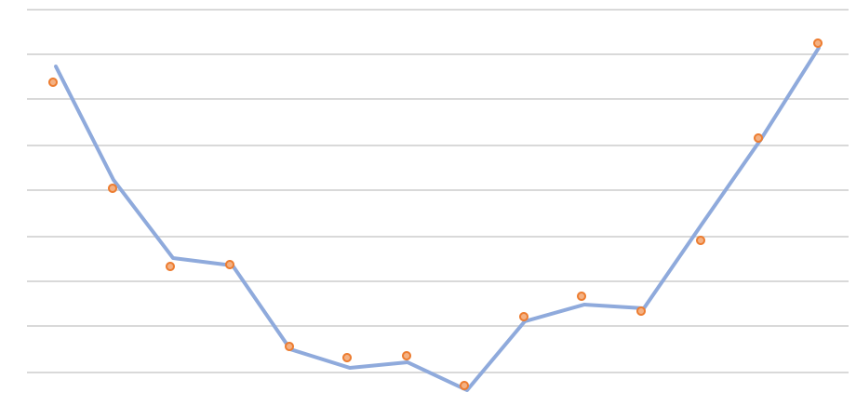

# ***Underfitting***

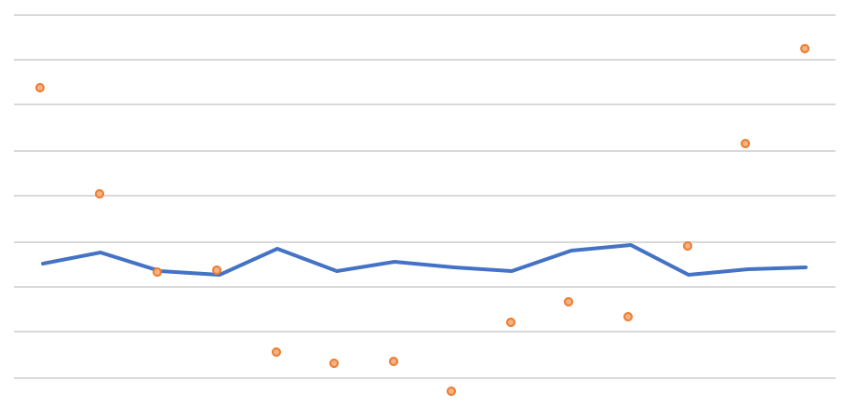

* Not enough trees
* Not enough depth
* Both training and testing error will both be high

# ***Optimal performance***

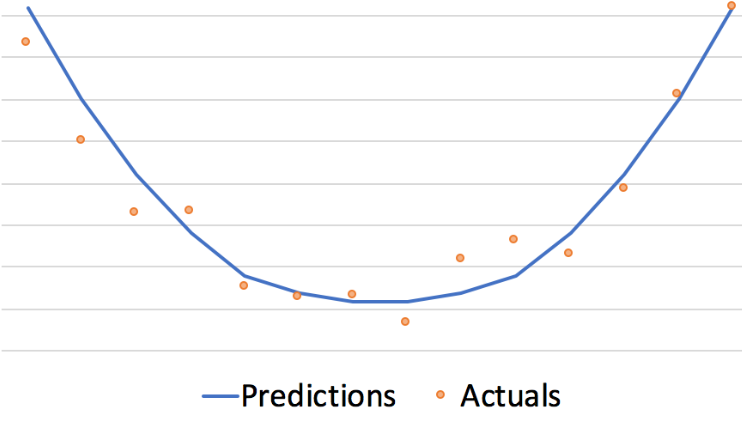



### ***Error due to under/over-fitting***

The candy dataset is prime for overfitting. With only 85 observations, if you use 20% for the testing dataset, you are losing a lot of vital data that could be used for modeling. Imagine the scenario where most of the chocolate candies ended up in the training data and very few in the holdout sample. Our model might only see that chocolate is a vital factor, but fail to find that other attributes are also important. In this exercise, you'll explore how using too many features (columns) in a random forest model can lead to overfitting.

A feature represents which columns of the data are used in a decision tree. The parameter `max_features` limits the number of features available.

* Create a random forest model with `25` trees, a random state of `1111`, and **`max_features`** of `2`. Read the print statements.

* Set **`max_features`** to `11` (the number of columns in the dataset). Read the print statements.

* Set **`max_features`** equal to `4`. Read the print statements.

In [59]:
cd = pd.read_csv('candy-data.csv')
X = cd.drop(columns=['competitorname', 'winpercent']).values
y = cd['winpercent'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=2)
rfr.fit(X_train, y_train)

# Print the training and testing accuracies 
print('The training error is {0:.2f}'.format(
  mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(
  mae(y_test, rfr.predict(X_test))))

# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=11)
rfr.fit(X_train, y_train)

# Print the training and testing accuracies 
print('The training error is {0:.2f}'.format(
  mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(
  mae(y_test, rfr.predict(X_test))))

# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=4)
rfr.fit(X_train, y_train)

# Print the training and testing accuracies 
print('The training error is {0:.2f}'.format(
  mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(
  mae(y_test, rfr.predict(X_test))))

The training error is 3.90
The testing error is 9.15
The training error is 3.59
The testing error is 10.00
The training error is 3.60
The testing error is 8.79


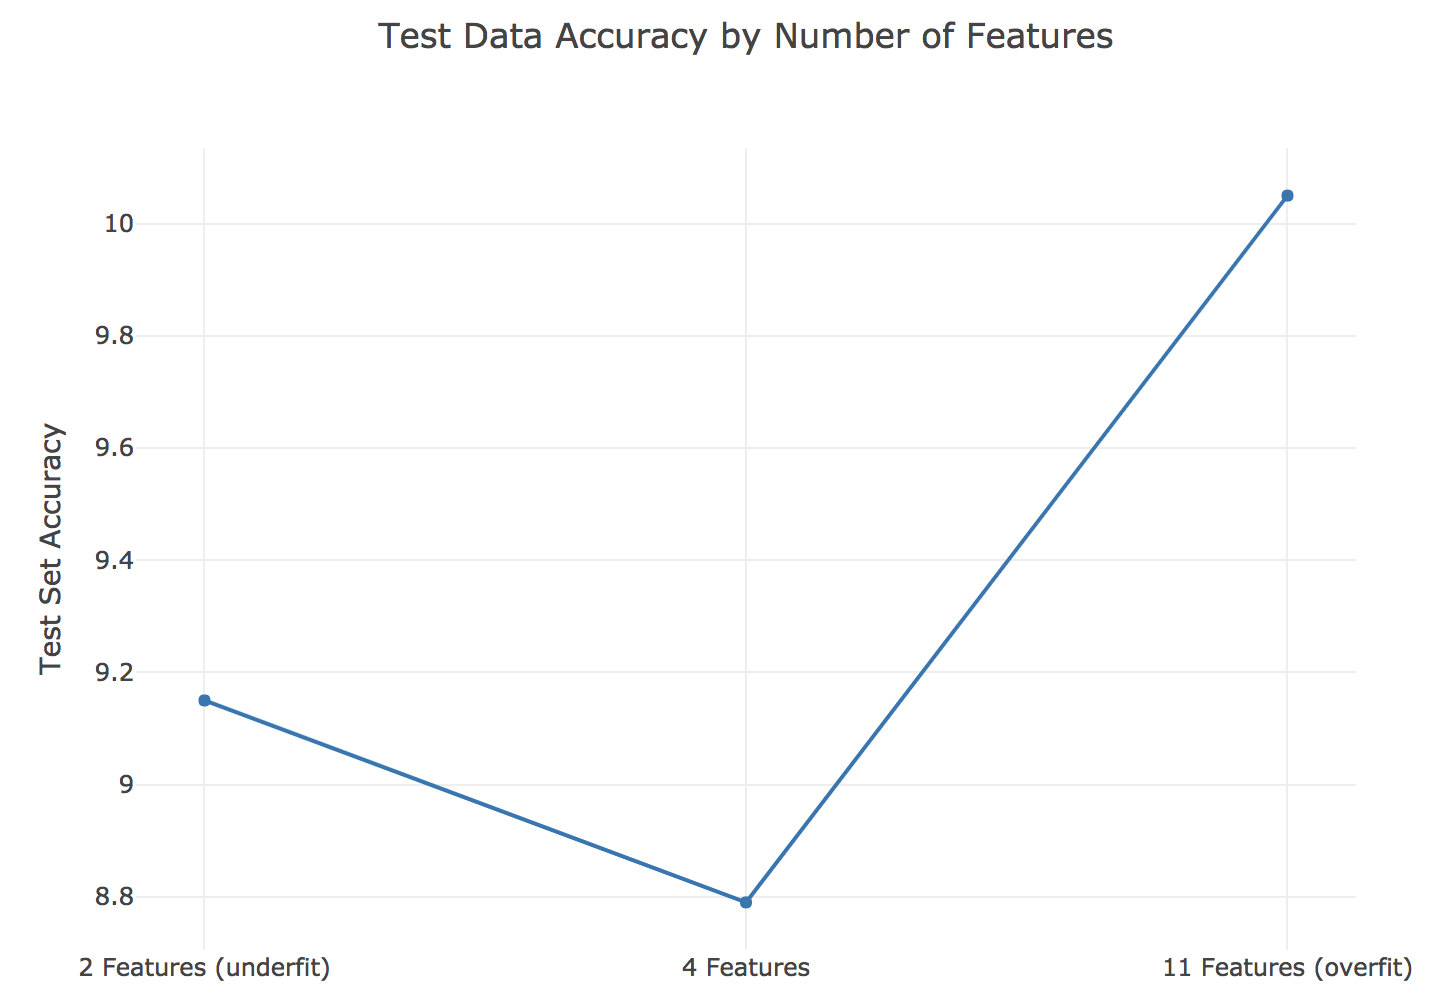

The chart below shows the performance at various max feature values. Sometimes, setting parameter values can make a huge difference in model performance.

### ***m I underfitting?***

You are creating a random forest model to predict if you will win a future game of Tic-Tac-Toe. Using the `tic_tac_toe` dataset, you have created training and testing datasets, `X_train`, `X_test`, `y_train`, and `y_test`.

You have decided to create a bunch of random forest models with varying amounts of trees (1, 2, 3, 4, 5, 10, 20, and 50). The more trees you use, the longer your random forest model will take to run. However, if you don't use enough trees, you risk underfitting. You have created a for loop to test your model at the different number of trees.

* For each loop, predict values for both the `X_train` and `X_test` datasets.
* For each loop, append the **`accuracy_score()`** of the `y_train` dataset and the corresponding predictions to `train_scores`.
* For each loop, append the **`accuracy_score()`** of the `y_test` dataset and the corresponding predictions to `test_scores`.
* Print the training and testing scores using the print statements.

In [61]:
from sklearn.metrics import accuracy_score

tic_tac_toe = pd.read_csv("tic-tac-toe.csv")
X = pd.get_dummies(tic_tac_toe.iloc[:,0:9])
y = tic_tac_toe.iloc[:, 9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:
    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train)
    # Create predictions for the X_train and X_test datasets.
    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)
    # Append the accuracy score for the test and train predictions.
    train_scores.append(round(accuracy_score(y_train,train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))
# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))

The training scores were: [0.94, 0.93, 0.98, 0.97, 0.99, 1.0, 1.0, 1.0]
The testing scores were: [0.83, 0.79, 0.89, 0.91, 0.91, 0.93, 0.97, 0.98]


Notice that with only one tree, both the train and test scores are low. As you add more trees, both errors improve. Even at 50 trees, this still might not be enough. Every time you use more trees, you achieve higher accuracy. At some point though, more trees increase training time, but do not decrease testing error.

### ***Two samples***

After building several classification models based on the `tic_tac_toe` dataset, you realize that some models do not generalize as well as others. You have created training and testing splits just as you have been taught, so you are curious why your validation process is not working.

After trying a different training, test split, you noticed differing accuracies for your machine learning model. Before getting too frustrated with the varying results, you have decided to see what else could be going on.

* Create samples `sample1` and `sample2` with `200` observations that could act as possible testing datasets.
* Use the list comprehension statement to find out how many observations these samples have in common.
* Use the **`Series.value_counts()`** method to print the values in both samples for column `Class`.

In [62]:
# Create two different samples of 200 observations 
sample1 = tic_tac_toe.sample(200, random_state=1111)
sample2 = tic_tac_toe.sample(200, random_state=1171)

# Print the number of common observations 
print(len([index for index in sample1.index if index in sample2.index]))

# Print the number of observations in the Class column for both samples 
print(sample1['Class'].value_counts())
print(sample2['Class'].value_counts())

40
positive    134
negative     66
Name: Class, dtype: int64
positive    123
negative     77
Name: Class, dtype: int64


Notice that there are a varying number of positive observations for both sample test sets. Sometimes creating a single test holdout sample is not enough to achieve the high levels of model validation you want. You need to use something more robust.

* If our models are not generalizing well or if we have limited data, we should be careful using a single training/validation split.

# ***Cross Validation***

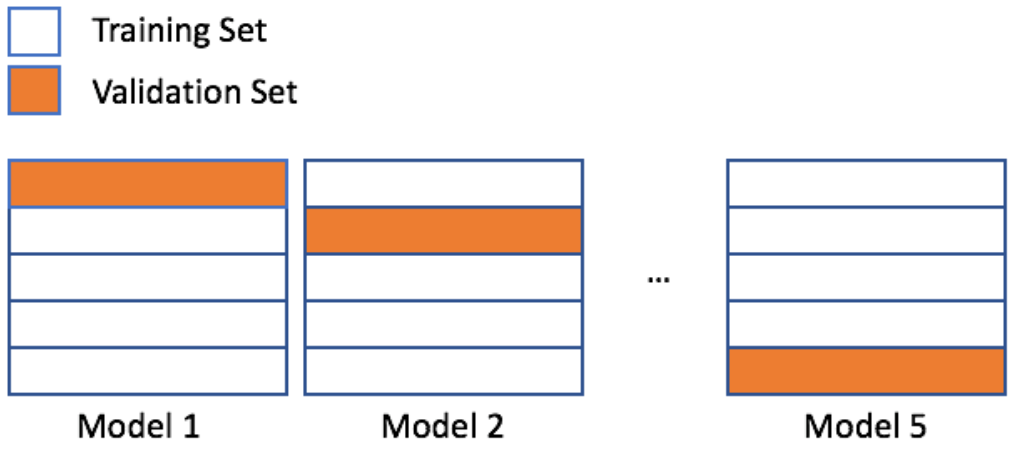

* Every observation is used for validation exactly one time
* **`KFold()`** splits data into serveral training and validation sets
  * **`n_splits`**: number of cross validation splits
  * **`shuffle`**: boolean indicating whether to shuffle data before splitting
  

In [9]:
from sklearn.model_selection import KFold

X = np.arange(1, 41)
y = np.array([0] * 20 + [1] * 20)
print(X)
print(y)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [15]:
kf = KFold(n_splits=5)
splits = kf.split(X)
splits # เป็นแค่การสร้าง index ของ observations ในแต่ละ split IT DOESN'T CONTAIN DATASETS

<generator object _BaseKFold.split at 0x7f7b08860dd0>

In [11]:
for train_index, test_index in splits:
    print(len(train_index), len(test_index))

32 8
32 8
32 8
32 8
32 8


In [14]:
# Print one of the index sets:
print(train_index)
print("\n")
print(test_index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


[32 33 34 35 36 37 38 39]


In [ ]:
rfr = RandomForestRegressor(n_estimators=25, random_state=1111)
errors = [] 

for train_index, val_index in splits: 
    X_train, y_train = X[train_index], y[train_index] 
    X_val, y_val = X[val_index], y[val_index] 
    rfr.fit(X_train, y_train) 
    predictions = rfr.predict(X_val) 
    errors.append(<some_accuracy_metric>)

print(np.mean(errors))

### ***scikit-learn's KFold()***

You just finished running a colleagues code that creates a random forest model and calculates an out-of-sample accuracy. You noticed that your colleague's code did not have a **`random_state`**, and the errors you found were completely different than the errors your colleague reported.

To get a better estimate for how accurate this random forest model will be on new data, you have decided to generate some indices to use for **`KFold`** cross-validation.


* Call the **`KFold()`** method to split data using five splits, shuffling, and a random state of `1111`.
* Use the **`split()`** method of `KFold` on `X`.
* Print the number of indices in both the train and validation indices lists.

In [17]:
from sklearn.model_selection import KFold

cd = pd.read_csv('candy-data.csv')
X = cd.drop(columns=['competitorname', 'winpercent']).values
y = cd['winpercent'].values

# Use KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

# Create splits
splits = kf.split(X)

# Print the number of indices
for train_index, val_index in splits:
    print("Number of training indices: %s" % len(train_index))
    print("Number of validation indices: %s" % len(val_index))

Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17


This dataset has 85 rows. You have created five splits - each containing 68 training and 17 validation indices. You can use these indices to complete 5-fold cross-validation.

### ***Using KFold indices***

You have already created splits, which contains indices for the candy-data dataset to complete 5-fold cross-validation. To get a better estimate for how well a colleague's random forest model will perform on a new data, you want to run this model on the five different training and validation indices you just created.

In this exercise, you will use these indices to check the accuracy of this model using the five different splits. A for loop has been provided to assist with this process.

* Use `train_index` and `val_index` to call the correct indices of `X` and `y` when creating training and validation data.

* Fit `rfc` using the training dataset

* Use `rfc` to create predictions for validation dataset and print the validation accuracy

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfc = RandomForestRegressor(n_estimators=25, random_state=1111)
kf = KFold(n_splits=5, shuffle=True, random_state=1111)
splits = kf.split(X) # ต้องมี เพราะใช้ generator หมดไปใน cell ข้างบนแล้ว

# Access the training and validation indices of splits
for train_index, val_index in splits:
    # Setup the training and validation data
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
    # Fit the random forest model
    rfc.fit(X_train, y_train)
    # Make predictions, and print the accuracy
    predictions = rfc.predict(X_val)
    print("Split accuracy: " + str(mse(y_val, predictions)))

Split accuracy: 150.99298148707666
Split accuracy: 171.22206240542593
Split accuracy: 131.72569156195593
Split accuracy: 80.61940183841385
Split accuracy: 221.63020627476214


**`KFold()`** is a great method for accessing individual indices when completing cross-validation. One drawback is needing a **`for`** loop to work through the indices though. 

# ***`cross_val_score()`***

* ไม่ต้องเขียน **`for`** loop แบบข้างบน

In [ ]:
cross_val_score(estimator=rfc, X=X, y=y, cv=5)

* **`estimator`** : the model to use
* **`X`** : the predictor dataset
* **`y`** : the response array
* **`cv`** : the number of cross-validation splits

In [ ]:
from sklearn.metrics import mean_absolute_error, make_scorer

# Create a scorer
mae_scorer = make_scorer(mean_absolute_error)

# Use different score metrics
cross_val_score(estimator=rfc, X=X, y=y, cv=5, scoring=mae_scorer)


### ***scikit-learn's methods***

You have decided to build a regression model to predict the number of new employees your company will successfully hire next month. You open up a new Python script to get started, but you quickly realize that **`sklearn`** has a lot of different modules. Let's make sure you understand the names of the modules, the methods, and which module contains which method.

Follow the instructions below to load in all of the necessary methods for completing cross-validation using **`sklearn`**. You will use modules:

* **`metrics`**
* **`model_selection`**
* **`ensemble`**

* Load the method for calculating the scores of cross-validation.
* Load the random forest regression method.
* Load the mean square error metric.
* Load the method for creating a scorer to use with cross-validation.

In [24]:
# Instruction 1: Load the cross-validation method
from sklearn.model_selection import cross_val_score

# Instruction 2: Load the random forest regression model
from sklearn.ensemble import RandomForestRegressor

# Instruction 3: Load the mean squared error method
# Instruction 4: Load the function for creating a scorer
from sklearn.metrics import mean_squared_error, make_scorer

It is easy to see how all of the methods can get mixed up, but it is important to know the names of the methods you need. You can always review the scikit-learn documentation should you need any help

### ***Implement cross_val_score()***

Your company has created several new candies to sell, but they are not sure if they should release all five of them. To predict the popularity of these new candies, you have been asked to build a regression model using the candy dataset. Remember that the response value is a head-to-head win-percentage against other candies.

Before you begin trying different regression models, you have decided to run cross-validation on a simple random forest model to get a baseline error to compare with any future results.


* Fill in **`cross_val_score()`**.
* Use `X_train` for the training data, and `y_train` for the response.
* Use `rfc` as the model, `10`-fold cross-validation, and `mse` for the scoring function.
* Print the mean of the `cv` results.

In [25]:
cd = pd.read_csv('candy-data.csv')
X_train = cd.drop(columns=['competitorname', 'winpercent']).values
y_train = cd['winpercent'].values

rfc = RandomForestRegressor(n_estimators=25, random_state=1111)
mse = make_scorer(mean_squared_error)

# Set up cross_val_score
cv = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10, scoring=mse)

# Print the mean error
print(cv.mean())

155.4061992697056


You now have a baseline score to build on. If you decide to build additional models or try new techniques, you should try to get an error lower than `155.56`. Lower errors indicate that your popularity predictions are improving.

# ***Leave one out Cross-Validation***

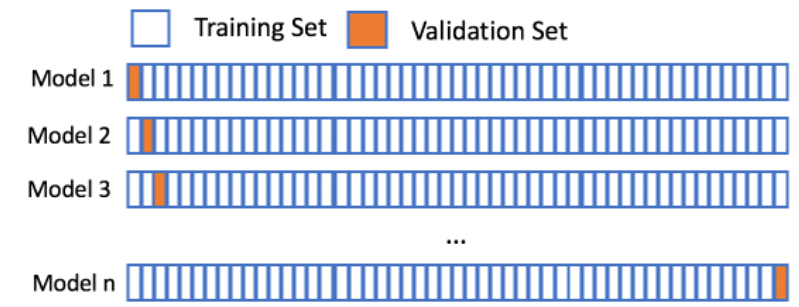

* Use a SINGLE observations as a complete validation set
* Use when data is small
* เนื่องจากใช้ทุกๆ observations มาเป็น validation ถ้าตัวอย่างมีขนาดใหญ่มาก จึงไม่ควรใช้ เพราะจะช้ามาก
  *  If you don't have time to wait while your computer runs through 1,000 models, you might want to use 5 or 10-fold cross-validation.

In [ ]:
n = X.shape[0]
mse = make_scorer(mean_squared_error)
cv_results = cross_val_score(estimator, X, y, scoring=mse, cv=n)

### ***Leave-one-out-cross-validation***

Let's assume your favorite candy is not in the candy dataset, and that you are interested in the popularity of this candy. Using 5-fold cross-validation will train on only 80% of the data at a time. The candy dataset only has 85 rows though, and leaving out 20% of the data could hinder our model. However, using leave-one-out-cross-validation allows us to make the most out of our limited dataset and will give you the best estimate for your favorite candy's popularity!

In this exercise, you will use **`cross_val_score()`** to perform LOOCV.

* Create a `scorer` using **`mean_absolute_error`** for **`cross_val_score()`** to use.

* Fill out **`cross_val_score()`** so that the model `rfr`, the newly defined `mae_scorer`, and LOOCV are used.

* Print the mean and the standard deviation of `scores` using numpy (loaded as `np`).

In [26]:
from sklearn.metrics import mean_absolute_error, make_scorer

cd = pd.read_csv('candy-data.csv')
X = cd.drop(columns=['competitorname', 'winpercent']).values
y = cd['winpercent'].values

# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

rfr = RandomForestRegressor(n_estimators=15, random_state=1111)

# Implement LOOCV
scores = cross_val_score(rfr, X=X, y=y, cv=85, scoring=mae_scorer)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))

The mean of the errors is: 9.52044832324183.
The standard deviation of the errors is: 7.349020637882744.


You have come along way with model validation techniques. The final chapter will wrap up model validation by discussing how to select the best model and give an introduction to parameter tuning.

# ***Random Forest Hyperparameters***

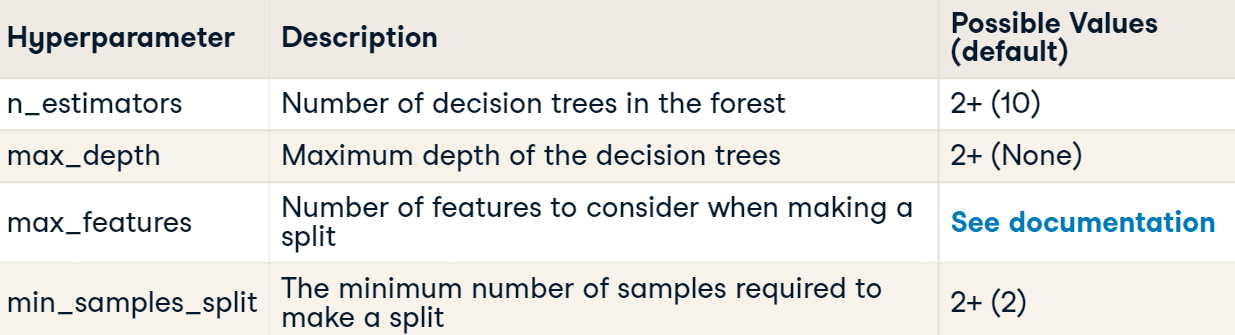

### ***Creating Hyperparameters***

For a school assignment, your professor has asked your class to create a random forest model to predict the average test score for the final exam.

After developing an initial random forest model, you are unsatisfied with the overall accuracy. You realize that there are too many hyperparameters to choose from, and each one has a lot of possible values. You have decided to make a list of possible ranges for the hyperparameters you might use in your next model.

Your professor has provided de-identified data for the last ten quizzes to act as the training data. There are 30 students in your class.

* Print **`.get_params()`** in the console to review the possible parameters of the model that you can tune.

* Create a maximum depth list, `[4, 8, 12]` and a minimum samples list `[2, 5, 10]` that specify possible values for each hyperparameter.

* Create one final list to use for the maximum features.
  * Use values 4 through the maximum number of features possible (10), by 2.



In [27]:
rfr = RandomForestRegressor()

# Review the parameters of rfr
print(rfr.get_params())

# Maximum Depth
max_depth = [4, 8, 12]

# Minimum samples for a split
min_samples_split = [2, 5, 10]

# Max features 
max_features = [4, 6, 8, 10]

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Hyperparameter tuning requires selecting parameters to tune, as well the possible values these parameters can be set to.

### ***Running a model using ranges***

You have just finished creating a list of hyperparameters and ranges to use when tuning a predictive model for an assignment. You have used `max_depth`, `min_samples_split`, and `max_features` as your range variable names.


* Randomly select a `max_depth`, `min_samples_split`, and `max_features` using your range variables.

* Print out all of the parameters for `rfr` to see which values were randomly selected.

In [28]:
from sklearn.ensemble import RandomForestRegressor
import random

# Fill in rfr using your variables
rfr = RandomForestRegressor(
    n_estimators=100,
    max_depth=random.choice(max_depth),
    min_samples_split=random.choice(min_samples_split),
    max_features=random.choice(max_features))

# Print out the parameters
print(rfr.get_params())  

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 12, 'max_features': 8, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Notice that `min_samples_split` was randomly set to 2. Since you specified a random state, `min_samples_split` will always be set to 2 if you only run this model one time.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV()
param_dist = {"max_depth": [4, 6, 8, None], # 4 parameters
              "max_features": range(2, 11), # 9 parameters
              "min_samples_split": range(2, 11)} # 9 parameters

* ถ้าใช้ GridSearchCV() จะรันทั้งหมด $4\times9\times9 = 324$ ครั้ง
* RandomizedSearchCV() จะรันราวๆ 30-40 ครั้ง

# ***`RandomizedSearchCV()` parameters***

* **`estimator`** : the model to use
* **`param_distributions`** : dictionary containing hyperparameters and possible values
* **`n_iter`** : number of iterations
* **`scoring`** : scoring method to use

# ***Setting `RandomizedSearchCV` parameters***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

param_dist = {"max_depth": [4, 6, 8, None],
              "max_features": range(2, 11),
              "min_samples_split": range(2, 11)}

rfr = RandomForestRegressor(n_estimators=20, random_state=1111)
scorer = make_scorer(mean_absolute_error)

random_search = RandomizedSearchCV(estimator=rfr,
                                   param_distributions=param_dist,
                                   n_iter=40, # 40 parameter sets
                                   cv=5)

random_search.fit(X, y)

### ***Preparing for RandomizedSearch***

Last semester your professor challenged your class to build a predictive model to predict final exam test scores. You tried running a few different models by randomly selecting hyperparameters. However, running each model required you to code it individually.

After learning about **`RandomizedSearchCV()`**, you're revisiting your professors challenge to build the best model. In this exercise, you will prepare the three necessary inputs for completing a random search.


* Finalize the parameter dictionary by adding a list for the **`max_depth`** parameter with options 2, 4, 6, and 8.

* Create a random forest regression model with ten trees and a **`random_state`** of 1111.

* Create a mean squared error scorer to use.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Finish the dictionary by adding the max_depth parameter
param_dist = {"max_depth": [2, 4, 6, 8],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 8, 16]}

# Create a random forest regression model
rfr = RandomForestRegressor(n_estimators=10, random_state=1111)

# Create a scorer to use (use the mean squared error)
scorer = make_scorer(mean_squared_error)

### ***Implementing RandomizedSearchCV***

You are hoping that using a random search algorithm will help you improve predictions for a class assignment. You professor has challenged your class to predict the overall final exam average score.

In preparation for completing a random search, you have created:

* `param_dist`: the hyperparameter distributions
* `rfr`: a random forest regression model
* `scorer`: a scoring method to use

* Load the method for conducting a random search in `sklearn`.

* Complete a random search by filling in the parameters: `estimator`, `param_distributions`, and `scoring`.

* Use 5-fold cross validation for this random search.

In [31]:
# Import the method for random search
from sklearn.model_selection import RandomizedSearchCV

# Build a random search using param_dist, rfr, and scorer
random_search = RandomizedSearchCV(estimator=rfr,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   scoring=scorer)

Although it takes a lot of steps, hyperparameter tuning with random search is well worth it and can improve the accuracy of your models. Plus, you are already using cross-validation to validate your best model.

# ***`RandomizedSearchCV()`'s attributes***

In [ ]:
# Best Score
rs.best_score_



```
5.45
```



In [ ]:
# Best Parameters
rs.best_params_



```
{'max_depth': 4, 'max_features': 8, 'min_samples_split': 4}
```



In [ ]:
# Best Estimator
rs.best_estimator_

# ***Using `.cv_results_`***

In [ ]:
max_depth = [item['max_depth'] for item in rs.cv_results_['params']]
scores = list(rs.cv_results_['mean_test_score'])
d = pd.DataFrame([max_depth, scores]).T
d.columns = ['Max Depth', 'Score']
d.groupby(['Max Depth']).mean()

# ***Selecting the best model***

* `rs.best_estimator_` contains the information of the best model

```
rs.best_estimator_
```



```
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                        max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=12, min_weight_fraction_leaf=0.0,
                        n_estimators=20, n_jobs=1, oob_score=False, random_state=1111,
                        verbose=0, warm_start=False)
```

# ***Using `.best_estimator_`***

Predict new data:

In [ ]:
rs.best_estimator_.predict(<new_data>)

Check the parameters:

In [ ]:
rs.best_estimator_.get_params()

Save model for use later:

In [ ]:
from sklearn.externals import joblib

joblib.dump(rfr, 'rfr_best_<date>.pkl')

### ***Selecting the best precision model***

Your boss has offered to pay for you to see three sports games this year. Of the 41 home games your favorite team plays, you want to ensure you go to three home games that they will definitely win. You build a model to decide which games your team will win.

To do this, you will build a random search algorithm and focus on model precision (to ensure your team wins). You also want to keep track of your best model and best parameters, so that you can use them again next year (if the model does well, of course). You have already decided on using the random forest classification model `rfc` and generated a parameter distribution `param_dist`.

* Create a precision scorer, precision using `make_scorer(<scoring_function>)`.

* Complete the random search method by using `rfc` and `param_dist`.

* Use `rs.cv_results_` to print the mean test scores.

* Print the best overall score.

In [55]:
tic_tac_toe = pd.read_csv("tic-tac-toe.csv")
X = pd.get_dummies(tic_tac_toe.iloc[:,0:9]).values
y = tic_tac_toe.iloc[:, 9]
y = y.str.replace('positive', '1')
y = y.str.replace('negative', '0')
y = y.astype(int)
y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [57]:
tic_tac_toe = pd.read_csv("tic-tac-toe.csv")
X = pd.get_dummies(tic_tac_toe.iloc[:,0:9]).values
y = tic_tac_toe.iloc[:, 9]
y = y.str.replace('positive', '1')
y = y.str.replace('negative', '0')
y = y.astype(int)
y = list(y.values)

param_dist = {'n_estimators': [10, 25, 50],
              'max_depth': range(2, 12, 2),
              'min_samples_split': range(2, 12, 2)}

rfc = RandomForestClassifier()

####################################################################

from sklearn.metrics import precision_score, make_scorer

# Create a precision scorer
precision = make_scorer(precision_score)

# Finalize the random search
rs = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist,
                        scoring = precision, cv=5, n_iter=10, random_state=1111)
rs.fit(X, y)

# print the mean test scores:
print('The accuracy for each run was: {}.'.format(rs.cv_results_['mean_test_score']))
# print the best model score:
print('The best accuracy for a single model was: {}'.format(rs.best_score_))

The accuracy for each run was: [0.87261786 0.75467658 0.67037762 0.89693163 0.88206756 0.87960898
 0.6926194  0.8164292  0.88717056 0.91048541].
The best accuracy for a single model was: 0.9104854100297632


Your model's precision was 93%! The best model accurately predicts a winning game 93% of the time. If you look at the mean test scores, you can tell some of the other parameter sets did really poorly. Also, since you used cross-validation, you can be confident in your predictions.